In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [286]:
img = cv2.imread('lenna.jpg',1)

In [287]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

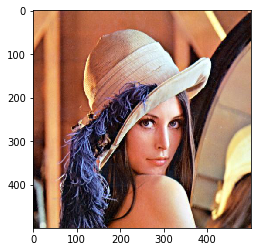

In [288]:
my_show(img)

## Gaussian Kernal

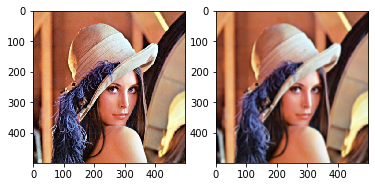

In [289]:
g_img = cv2.GaussianBlur(img,(11,11),2)#2是方差
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(g_img)

In [290]:
kernal_1d = cv2.getGaussianKernel(11,2)

In [291]:
g1_img = cv2.sepFilter2D(img,-1,kernal_1d,kernal_1d)

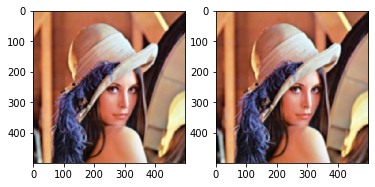

In [292]:
plt.subplot(121)
my_show(g_img)
plt.subplot(122)
my_show(g1_img)

## Laplacian

In [293]:
kernal = np.array([[0,1,0],[1,-4,1],[0,1,0]])

In [294]:
lap_img = cv2.filter2D(img,-1,kernal)

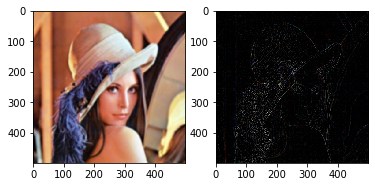

In [295]:
g_img = cv2.GaussianBlur(img, (11,11),2)
plt.subplot(121)
my_show(g_img)
plt.subplot(122)
my_show(lap_img)

In [296]:
kernal_strong = np.array([[1,1,1],[1,-8,1],[1,1,1]])
lap_img = cv2.filter2D(img,-1,kernal_strong)

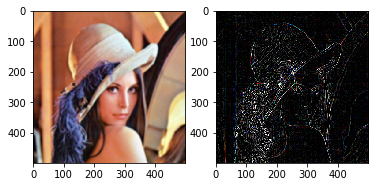

In [297]:
g_img = cv2.GaussianBlur(img, (11,11),2)
plt.subplot(121)
my_show(g_img)
plt.subplot(122)
my_show(lap_img)

# image sharpen

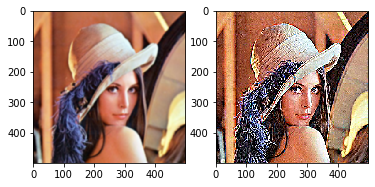

In [298]:
kernal_strong = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
lap_img = cv2.filter2D(img,-1,kernal_strong)
plt.subplot(121)
my_show(g_img)
plt.subplot(122)
my_show(lap_img)

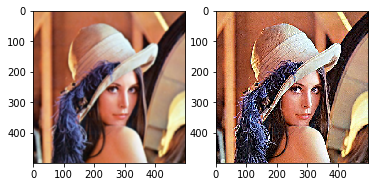

In [299]:
kernal_strong = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
lap_img = cv2.filter2D(img,-1,kernal_strong)
plt.subplot(121)
my_show(g_img)
plt.subplot(122)
my_show(lap_img)

# Sobel

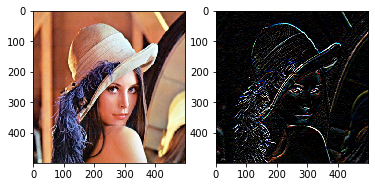

In [300]:
y_kernal = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sy_img = cv2.filter2D(img,-1,y_kernal)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sy_img)

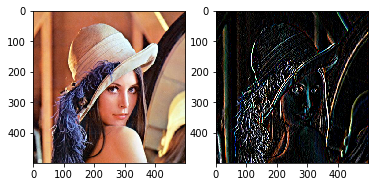

In [301]:
x_kernal = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sx_img = cv2.filter2D(img,-1,x_kernal)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(sx_img)

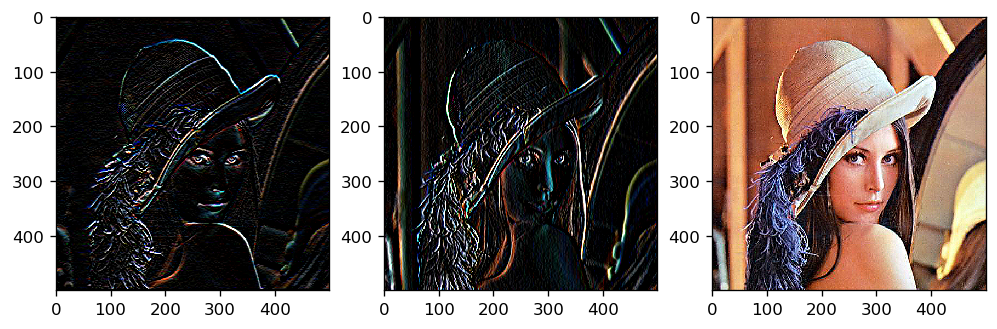

In [302]:
plt.figure(figsize = (10,10),dpi = 120)
plt.subplot(131)
my_show(sy_img)
plt.subplot(132)
my_show(sx_img)
plt.subplot(133)
my_show(lap_img)

# median blur

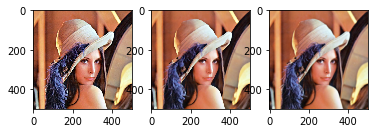

In [303]:
md_img = cv2.medianBlur(img,7)
plt.subplot(131)
my_show(img)
plt.subplot(132)
my_show(md_img)
plt.subplot(133)
my_show(g_img)

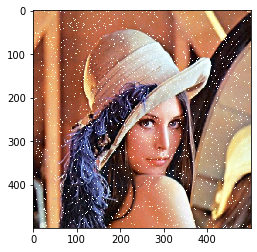

In [304]:
noise_img = cv2.imread('noisy.jpg',1)
my_show(noise_img)

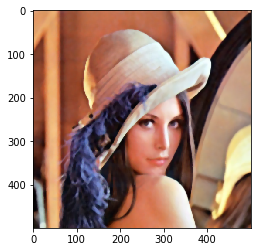

In [305]:
denoise_img = cv2.medianBlur(noise_img,7)
my_show(denoise_img)

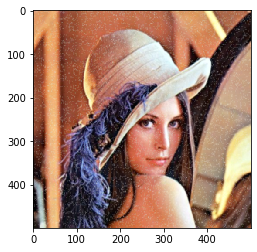

In [306]:
denoise_img = cv2.GaussianBlur(noise_img,(3,3),2)
my_show(denoise_img)

# Harris Corner

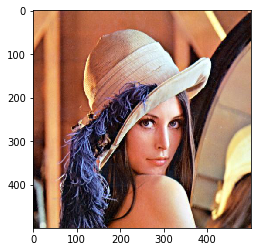

In [307]:
my_show(img)

In [308]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [309]:
def my_show_gray(img):
    plt.imshow(img,cmap='gray')

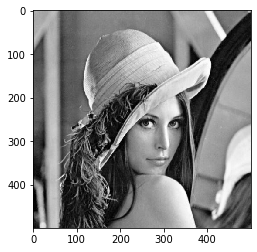

In [310]:
my_show_gray(img_gray)
#my_show_gray(img) can not show properly, yellow will become blue!

In [311]:
img_harris = cv2.cornerHarris(img_gray,2,3,0.03)

In [312]:
img_harris

array([[-5.01832985e-11, -5.01832985e-11, -7.57553326e-11, ...,
         2.92261063e-07, -2.09157752e-05, -1.36394247e-05],
       [-5.01832985e-11, -5.01832985e-11, -7.57553326e-11, ...,
         2.92261063e-07, -2.09157752e-05, -1.36394247e-05],
       [ 1.01918654e-10,  1.01918654e-10,  1.40084999e-10, ...,
         3.48959247e-07, -2.44567327e-05, -1.48766167e-05],
       ...,
       [ 8.33262561e-08,  8.33262561e-08,  2.38183745e-07, ...,
         4.22016399e-07, -1.86622785e-07, -1.93641128e-07],
       [-6.78372558e-09, -6.78372558e-09,  1.68417102e-09, ...,
         1.05523100e-07,  2.55375809e-09, -5.79053214e-08],
       [-2.46164937e-08, -2.46164937e-08,  3.54918157e-08, ...,
         3.08590220e-09,  1.43225893e-08,  1.99297396e-08]], dtype=float32)

In [313]:
threshold = np.max(img_harris)*0.02

In [314]:
threshold

0.00016283340752124787

In [315]:
#img = cv2.imread('test1.jpg',1)
img[img_harris>threshold] = [0,0,255]

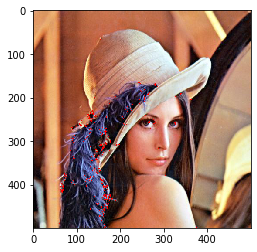

In [316]:
my_show(img)

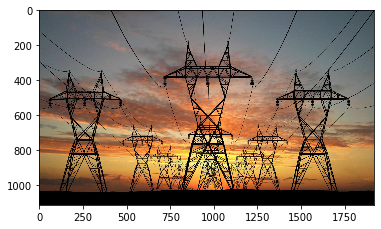

In [317]:
img_t = cv2.imread('towers.jpg',1)
my_show(img_t)

In [318]:
imgt_gray = (cv2.cvtColor(img_t,cv2.COLOR_BGR2GRAY))
imgt_harris = cv2.cornerHarris(imgt_gray,2,3,0.03)
imgt_harris = cv2.dilate(imgt_harris,None)
imgt_harris

array([[-4.5408860e-10, -2.8326730e-10,  2.0271027e-10, ...,
         2.6232067e-07,  9.3627086e-06,  9.3627086e-06],
       [-4.5408860e-10, -2.8326730e-10,  2.0271027e-10, ...,
         2.6232067e-07,  9.5346768e-05,  9.5346768e-05],
       [-1.3286522e-10, -4.4316877e-11,  2.0271027e-10, ...,
         2.6232067e-07,  1.9505982e-04,  1.9505982e-04],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

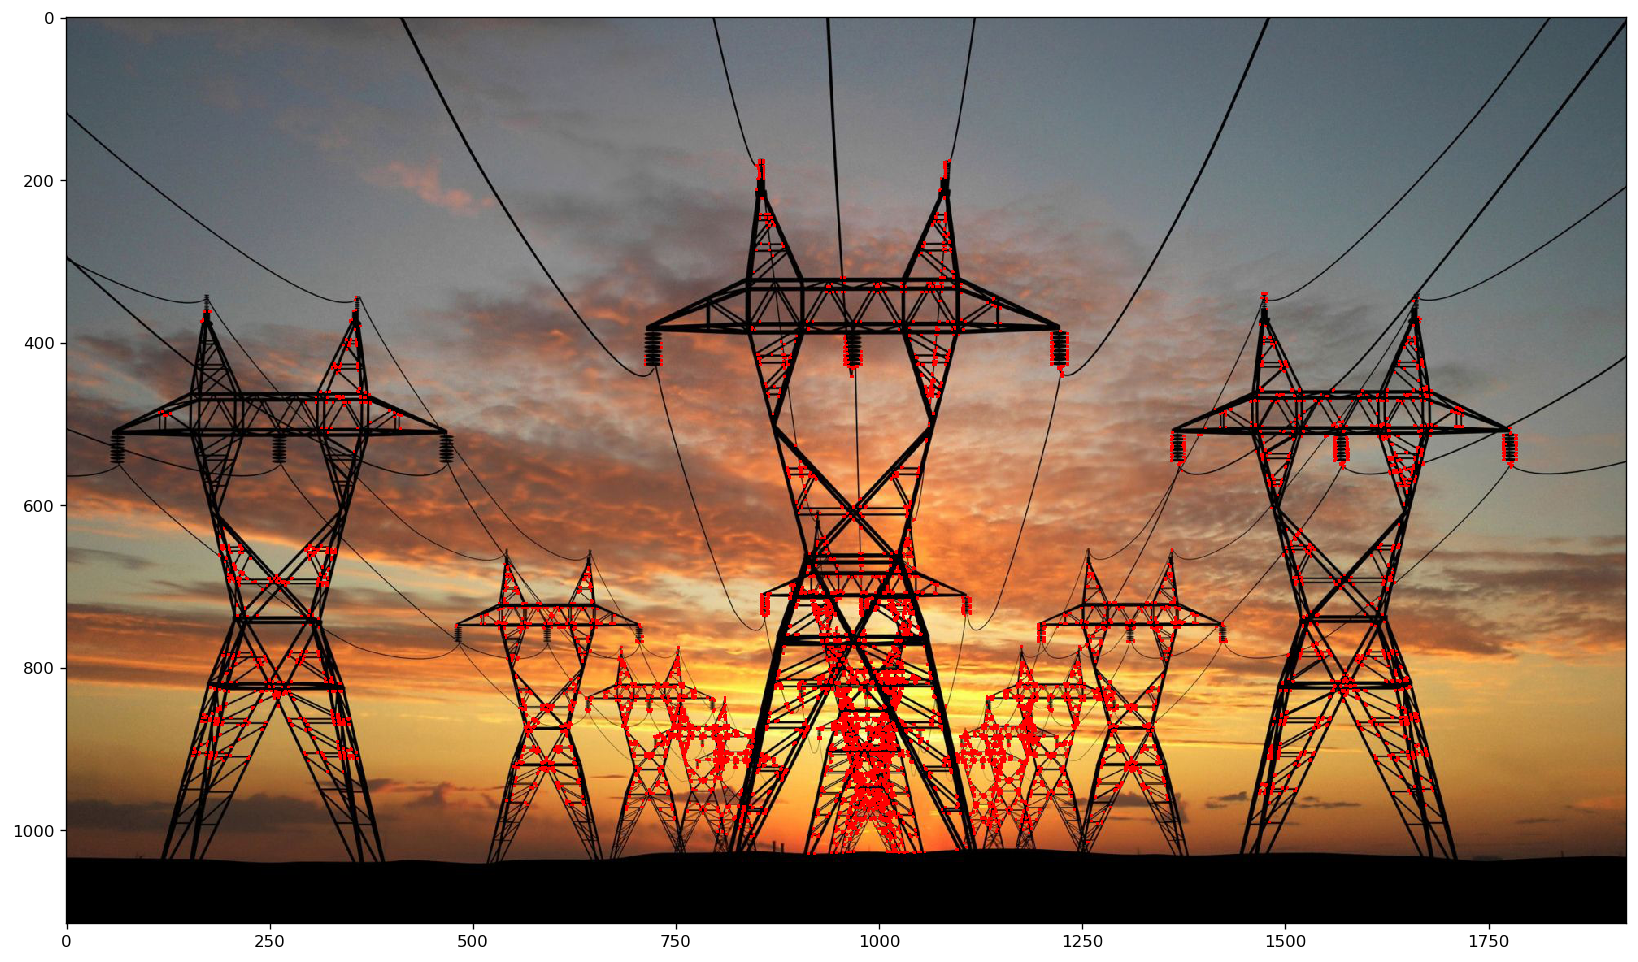

In [319]:
thresholdt = np.max(imgt_harris)*0.03
img_t[imgt_harris>thresholdt] = [0,0,255]
plt.figure(figsize = (20,10),dpi = 120)
my_show(img_t)

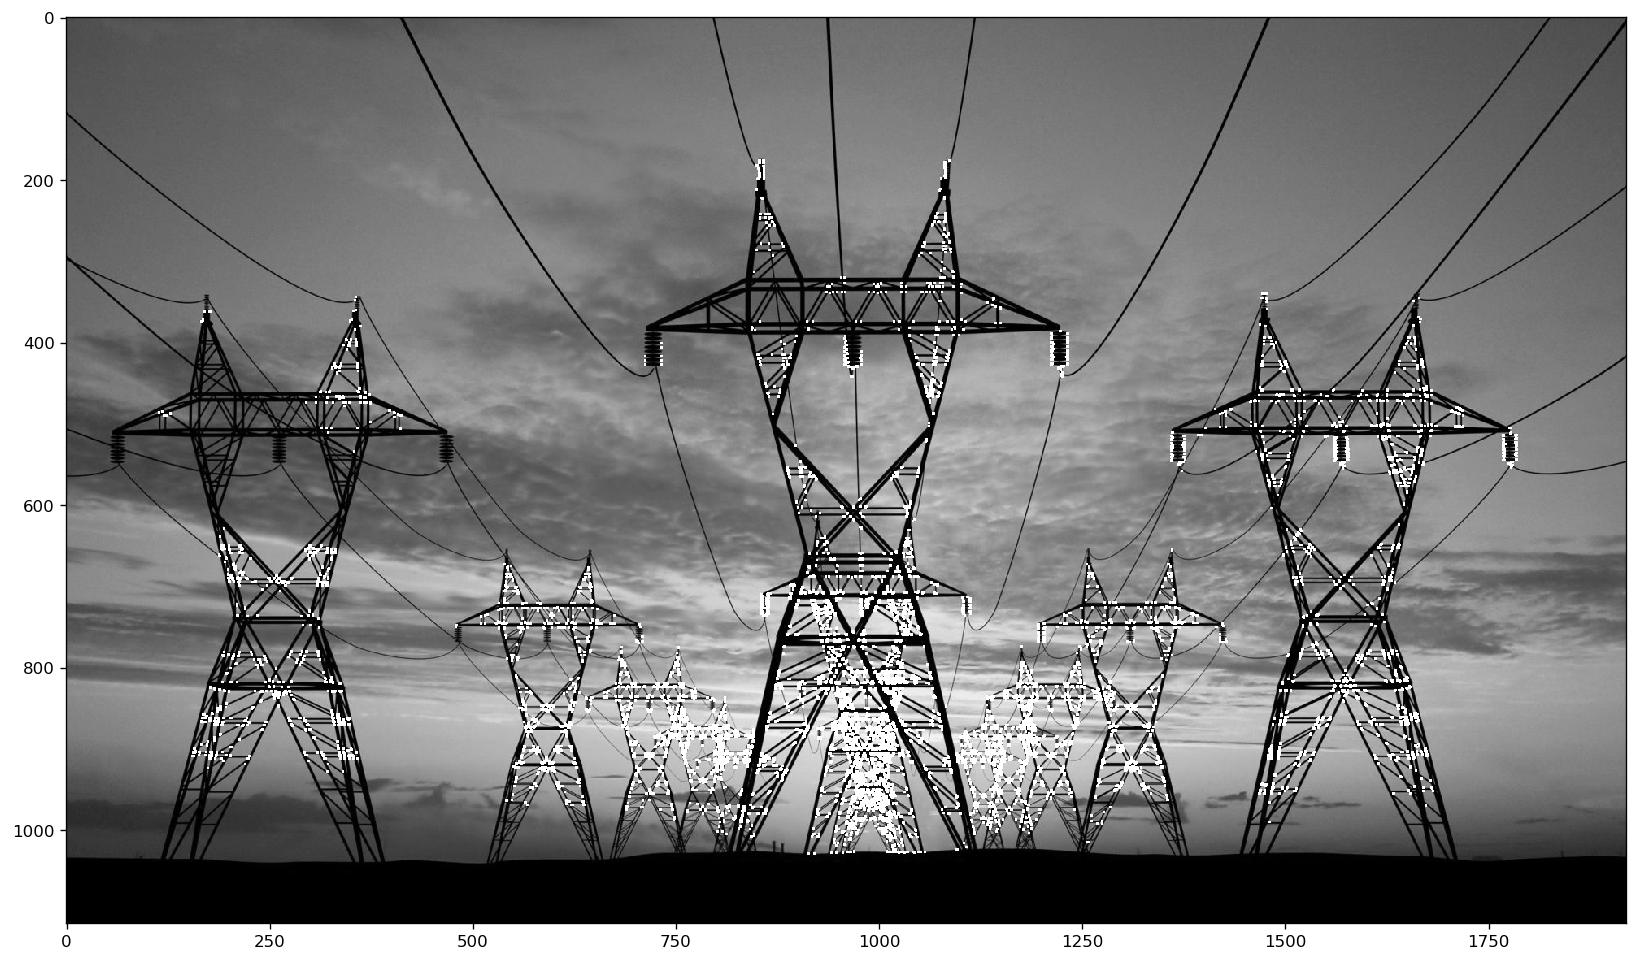

In [320]:
thresholdt = np.max(imgt_harris)*0.03
imgt_gray[imgt_harris>thresholdt] = 255
plt.figure(figsize =(20,10),dpi=120)
my_show_gray(imgt_gray)

## SIFT

In [321]:
cv2.__version__

'3.4.1'

In [324]:
img = cv2.imread('lenna.jpg',1)
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(img)

In [325]:
len(kp)

1327

In [326]:
kp,des = sift.compute(img,kp)
print(des.shape)

(1327, 128)


In [327]:
img_sift = cv2.drawKeypoints(img,kp,outImage = np.array([]),flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

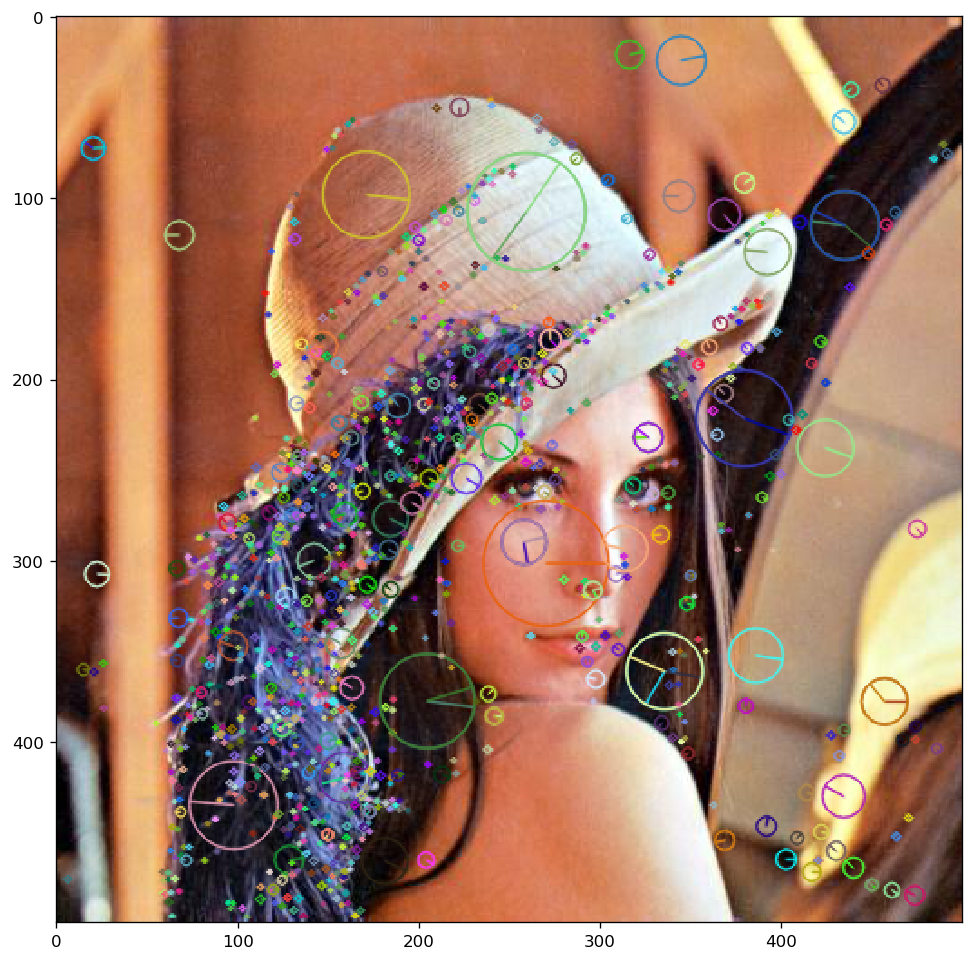

In [328]:
plt.figure(figsize=(10,10),dpi=120)
my_show(img_sift)

In [351]:
test =  np.array([[0,1,2],[3,4,5],[6,7,8]])
H = np.zeros(256, dtype=int)
H[test[2][1]] = H[test[2][1]] + 1
H[test[2][1]]

1

In [352]:
img = cv2.imread('noisy.jpg',1)
B,G,R = cv2.split(img)


array([[145, 146, 226, ..., 126, 101,  70],
       [141, 140, 143, ..., 197, 102,  69],
       [136, 135, 137, ..., 132, 110,  74],
       ...,
       [ 14,   7,  16, ...,  50,  49,  49],
       [ 12,   8,  20, ...,  54,  55,  56],
       [ 11,   9,  22, ...,  53,  56,  58]], dtype=uint8)

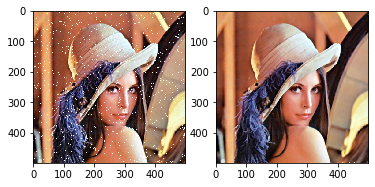

In [401]:
img = cv2.imread('noisy.jpg',1)
def c_medianBlur(img, kernel=3, padding_way = None):
    B,G,R = cv2.split(img)
    k = kernal
# B channel
    for x in range(int(k/2),B.shape[0]-int(k/2)-1):
        for y in range(int(k/2),B.shape[1]-int(k/2)-1):
            sum_b = []
            for i in range(-int(k/2),int(k/2)+1):
                for j in range(-int(k/2),int(k/2)+1):
                     sum_b.append(B[x+i][y+j])
            B[x][y] = np.median(sum_b)
# G channel
    for x in range(int(k/2),G.shape[0]-int(k/2)-1):
        for y in range(int(k/2),G.shape[1]-int(k/2)-1):
            sum_g = []
            for i in range(-int(k/2),int(k/2)+1):
                for j in range(-int(k/2),int(k/2)+1):
                     sum_g.append(G[x+i][y+j])
            G[x][y] = np.median(sum_g)
# R channel
    for x in range(int(k/2),R.shape[0]-int(k/2)-1):
        for y in range(int(k/2),R.shape[1]-int(k/2)-1):
            sum_r = []
            for i in range(-int(k/2),int(k/2)+1):
                for j in range(-int(k/2),int(k/2)+1):
                     sum_r.append(R[x+i][y+j])
            R[x][y] = np.median(sum_r)
    img_medianBlur = cv2.merge([B,G,R])
    return img_medianBlur
c_img = c_medianBlur(img,3)
plt.subplot(121)
my_show(img)
plt.subplot(122)
my_show(c_img)

    

In [393]:
img = cv2.imread('noisy.jpg',1)
#print(img.shape[0]-int(kernal/2)-1)
B,G,R = cv2.split(img)
print(B)
B = np.array([[1,2,3],[1,2,3],[1,2,3]])
G = np.array([[1,2,3],[1,2,3],[1,2,3]])
R = np.array([[1,2,3],[1,2,3],[1,2,3]]
img = cv2.merge([B,G,R])
img

(500, 500)
